OpenClassrooms
Project 4, Data Scientist
Author : Oumeima EL GHARBI
Date : August,September 2022

# Feature Engineering : Standardisation and Encoding

### Introduction

This feature engineering notebook produces three train/test dataset to predict :
- Log-SiteEnergyUseWN(kBtu)
- Log-TotalGHGEmissions
- Log-TotalGHGEmissions using the ENERGYSTARScore as a feature

#### Importing libraries

In [51]:
%reset -f

import pickle

import warnings
warnings.filterwarnings(action="ignore")

from exploration import *

from sklearn. model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [52]:
# Heure démarrage
t0 = time()

# seed pour les générateurs aléatoires
seed = 1
print("Seed value: ", seed)

Seed value:  1


#### Loading dataset

In [53]:
global columns_to_categorize
columns_to_categorize = ["BuildingType", "PrimaryPropertyType", "Neighborhood"]
category_types = {column: 'object' for column in columns_to_categorize}

path = "./dataset/cleaned/"
filename = "data_exploration.csv"
dataset_path = "{}{}".format(path, filename)
# we assign the categorical features with a categotical type

dataset = pd.read_csv(dataset_path, encoding='utf-8', dtype=category_types)

In [54]:
dataset.shape

(1484, 11)

In [55]:
dataset.dtypes

Neighborhood                            object
BuildingType                            object
PrimaryPropertyType                     object
ENERGYSTARScore                        float64
Log-NumberofFloors                     float64
Log-PropertyGFATotal                   float64
Log-PropertyGFABuilding(s)             float64
Log-LargestPropertyUseTypeGFA          float64
Log-SecondLargestPropertyUseTypeGFA    float64
Log-SiteEnergyUseWN(kBtu)              float64
Log-TotalGHGEmissions                  float64
dtype: object

In [56]:
dataset.columns

Index(['Neighborhood', 'BuildingType', 'PrimaryPropertyType',
       'ENERGYSTARScore', 'Log-NumberofFloors', 'Log-PropertyGFATotal',
       'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA',
       'Log-SecondLargestPropertyUseTypeGFA', 'Log-SiteEnergyUseWN(kBtu)',
       'Log-TotalGHGEmissions'],
      dtype='object')

### 1) Separation common train and test dataset

#### Separation features : vectors / target

In [57]:
models_targets = ["Log-SiteEnergyUseWN(kBtu)", "Log-TotalGHGEmissions"]

In [58]:
# List of variables / features for the predicition and the target
models_energy_target = ["Log-SiteEnergyUseWN(kBtu)"]
models_energy_features = [feature for feature in dataset.columns if feature not in ['ENERGYSTARScore', *models_energy_target, *models_targets]]

models_energy = models_energy_features + models_energy_target

print(models_energy_features, end="\n\n")
print(models_energy_target, end="\n\n")

print("Verification :", len(models_energy_features) + len(models_energy_target) == len(models_energy))

['Neighborhood', 'BuildingType', 'PrimaryPropertyType', 'Log-NumberofFloors', 'Log-PropertyGFATotal', 'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA', 'Log-SecondLargestPropertyUseTypeGFA']

['Log-SiteEnergyUseWN(kBtu)']

Verification : True


In [59]:
# List of variables / features for the predicition and the target
models_CO2_target = ["Log-TotalGHGEmissions"]
models_CO2_features = [feature for feature in dataset.columns if feature not in ['ENERGYSTARScore', *models_energy_target, *models_targets]]

models_CO2 = models_CO2_features + models_CO2_target

print(models_CO2_features, end="\n\n")
print(models_CO2_target, end="\n\n")

print("Verification :", len(models_CO2_features) + len(models_CO2_target) == len(models_CO2))

['Neighborhood', 'BuildingType', 'PrimaryPropertyType', 'Log-NumberofFloors', 'Log-PropertyGFATotal', 'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA', 'Log-SecondLargestPropertyUseTypeGFA']

['Log-TotalGHGEmissions']

Verification : True


In [60]:
# List of variables / features for the predicition and the target
models_ENERGYSTARScore_target = ["Log-TotalGHGEmissions"]
models_ENERGYSTARScore_features = [feature for feature in dataset.columns if feature not in [*models_energy_target, *models_targets]]

models_ENERGYSTARScore = models_ENERGYSTARScore_features + models_ENERGYSTARScore_target

print(models_ENERGYSTARScore_features, end="\n\n")
print(models_ENERGYSTARScore_target, end="\n\n")

print("Verification :", len(models_ENERGYSTARScore_features) + len(models_ENERGYSTARScore_target) == len(models_ENERGYSTARScore))

['Neighborhood', 'BuildingType', 'PrimaryPropertyType', 'ENERGYSTARScore', 'Log-NumberofFloors', 'Log-PropertyGFATotal', 'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA', 'Log-SecondLargestPropertyUseTypeGFA']

['Log-TotalGHGEmissions']

Verification : True


#### Train / Test Split

##### Energy and CO2

In [61]:
# We create a training set and a test set (the test set contains 30% of the dataset)
train_common, test_common = train_test_split(dataset, test_size=0.3,  random_state=seed)

In [62]:
train_common.shape

(1038, 11)

In [63]:
test_common.shape

(446, 11)

##### ENERGYSTARScore

In [64]:
# we drop the buildings for which the EnergyStarScore is missing
dataset_clean = dataset.dropna(axis=0)
train_clean, test_clean = train_test_split(dataset_clean, test_size=0.3, random_state=seed)

In [65]:
train_clean.shape

(679, 11)

In [66]:
test_clean.shape

(291, 11)

### Selecting train/test set for Energy, CO2 and ENERGYSTARScore

In [67]:
train_energy, test_energy = train_common[models_energy], test_common[models_energy]
train_CO2, test_CO2 = train_common[models_CO2], test_common[models_CO2]
train_ENERGYSTARScore, test_ENERGYSTARScore = train_clean[models_ENERGYSTARScore], test_clean[models_ENERGYSTARScore]

In [68]:
train_energy

,Neighborhood,BuildingType,PrimaryPropertyType,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-SiteEnergyUseWN(kBtu)
654,Downtown,Nonresidential,Other,1.386294,10.579514,10.384709,10.579514,0.000000,15.000081
1012,Greater duwamish,Nonresidential,Distribution center,0.693147,10.296205,10.296205,9.615872,9.590146,14.237413
1152,Greater duwamish,Nonresidential,Small- and mid-sized office,1.386294,10.800657,10.800657,10.385728,9.216124,14.181158
242,East,Nonresidential,Medical office,2.708050,13.444677,12.550952,12.507602,12.507598,16.867466
1315,East,Nonresidential cos,Mixed use property,1.098612,10.292451,10.016325,9.312446,9.009936,14.734421
...,...,...,...,...,...,...,...,...,...
715,Greater duwamish,Nonresidential,Small- and mid-sized office,1.098612,10.250794,10.250794,10.210457,0.000000,14.095333
905,Magnolia / queen anne,Nonresidential,Small- and mid-sized office,1.098612,9.904637,9.904637,9.941987,0.000000,13.442743
1096,Greater duwamish,Nonresidential,Warehouse,0.693147,10.784793,10.784793,10.615972,8.922792,14.954591
235,Downtown,Nonresidential,Large office,2.484907,11.540998,11.540998,11.449773,8.922792,15.615178


In [69]:
train_CO2

,Neighborhood,BuildingType,PrimaryPropertyType,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
654,Downtown,Nonresidential,Other,1.386294,10.579514,10.384709,10.579514,0.000000,4.986889
1012,Greater duwamish,Nonresidential,Distribution center,0.693147,10.296205,10.296205,9.615872,9.590146,3.771611
1152,Greater duwamish,Nonresidential,Small- and mid-sized office,1.386294,10.800657,10.800657,10.385728,9.216124,2.402430
242,East,Nonresidential,Medical office,2.708050,13.444677,12.550952,12.507602,12.507598,5.000518
1315,East,Nonresidential cos,Mixed use property,1.098612,10.292451,10.016325,9.312446,9.009936,4.409642
...,...,...,...,...,...,...,...,...,...
715,Greater duwamish,Nonresidential,Small- and mid-sized office,1.098612,10.250794,10.250794,10.210457,0.000000,2.287471
905,Magnolia / queen anne,Nonresidential,Small- and mid-sized office,1.098612,9.904637,9.904637,9.941987,0.000000,1.719189
1096,Greater duwamish,Nonresidential,Warehouse,0.693147,10.784793,10.784793,10.615972,8.922792,4.376637
235,Downtown,Nonresidential,Large office,2.484907,11.540998,11.540998,11.449773,8.922792,5.643856


In [70]:
train_ENERGYSTARScore

,Neighborhood,BuildingType,PrimaryPropertyType,ENERGYSTARScore,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
525,Greater duwamish,Nonresidential,Warehouse,57.0,0.693147,12.097451,12.097451,12.090033,0.000000,3.223664
78,Ballard,Nonresidential,Hospital,14.0,1.791759,12.561416,12.561416,12.620372,11.910802,7.596643
1471,Downtown,Nonresidential,Hotel,89.0,2.708050,11.881830,11.881830,11.979805,0.000000,3.938081
896,Ballard,Nonresidential,Retail store,82.0,0.693147,10.017753,10.017753,10.046202,0.000000,3.490124
1065,Greater duwamish,Nonresidential,Warehouse,91.0,0.693147,10.586610,10.586610,10.586610,0.000000,2.327278
...,...,...,...,...,...,...,...,...,...,...
1130,Greater duwamish,Nonresidential,Warehouse,49.0,0.693147,10.797349,10.797349,10.338188,9.798183,4.136765
112,Northwest,Nonresidential,Hotel,70.0,1.609438,11.080510,11.080510,11.080510,0.000000,5.343577
1378,East,Nonresidential,Worship facility,38.0,0.693147,10.537442,10.537442,10.863336,0.000000,5.018802
322,Greater duwamish,Nonresidential,Warehouse,63.0,0.693147,10.927753,10.927753,10.927753,0.000000,1.530395


### 2) Normalization

In [71]:
print("We separate categorical variables from numerical variables.")

We separate categorical variables from numerical variables.


##### Energy and CO2

In [72]:
dataset.select_dtypes('object') # we don't have 'object' here but it is just in case.

categorical_columns = dataset.select_dtypes('object').columns
numerical_columns_energy_CO2 = dataset[models_energy_features].select_dtypes(include='number').columns
#numerical_columns = X.select_dtypes(include='number').columns

print("Shape of categorical variables : ", categorical_columns.shape)
print("Shape of numerical variables :", numerical_columns_energy_CO2.shape)

Shape of categorical variables :  (3,)
Shape of numerical variables : (5,)


##### ENERGYSTARScore

In [73]:
dataset.select_dtypes('object') # we don't have 'object' here but it is just in case.

categorical_columns = dataset.select_dtypes('object').columns
numerical_columns_ENERGYSTARScore = dataset[models_ENERGYSTARScore_features].select_dtypes(include='number').columns

print("Shape of categorical variables : ", categorical_columns.shape)
print("Shape of numerical variables :", numerical_columns_ENERGYSTARScore.shape)

Shape of categorical variables :  (3,)
Shape of numerical variables : (6,)


#### 1) Data Standardisation

We have to standardize the variables before learning a **Ridge Regression**.
Standardizing means that each variable will have a **standard deviation** equal to 1.

##### Energy

In [74]:
print("Numerical variables standardization")
print("We have :", numerical_columns_energy_CO2.shape[0], "numerical features to standardize.",end="\n\n")

print(numerical_columns_energy_CO2)

Numerical variables standardization
We have : 5 numerical features to standardize.

Index(['Log-NumberofFloors', 'Log-PropertyGFATotal',
       'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA',
       'Log-SecondLargestPropertyUseTypeGFA'],
      dtype='object')


In [75]:
# We train / fit the scaler on the training set / Computes the mean and std to be used for later scaling.
std_scaler_energy = StandardScaler().fit(train_energy[numerical_columns_energy_CO2])
# We transform the training set and the testing set / Performs standardization by centering and scaling.
train_energy_std, test_energy_std = train_energy.copy(), test_energy.copy()

train_energy_std[numerical_columns_energy_CO2] = std_scaler_energy.transform(train_energy[numerical_columns_energy_CO2])
test_energy_std[numerical_columns_energy_CO2] = std_scaler_energy.transform(test_energy[numerical_columns_energy_CO2])

print("Before")
display(train_energy)
print("After")
display(train_energy_std)

Before


,Neighborhood,BuildingType,PrimaryPropertyType,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-SiteEnergyUseWN(kBtu)
654,Downtown,Nonresidential,Other,1.386294,10.579514,10.384709,10.579514,0.000000,15.000081
1012,Greater duwamish,Nonresidential,Distribution center,0.693147,10.296205,10.296205,9.615872,9.590146,14.237413
1152,Greater duwamish,Nonresidential,Small- and mid-sized office,1.386294,10.800657,10.800657,10.385728,9.216124,14.181158
242,East,Nonresidential,Medical office,2.708050,13.444677,12.550952,12.507602,12.507598,16.867466
1315,East,Nonresidential cos,Mixed use property,1.098612,10.292451,10.016325,9.312446,9.009936,14.734421
...,...,...,...,...,...,...,...,...,...
715,Greater duwamish,Nonresidential,Small- and mid-sized office,1.098612,10.250794,10.250794,10.210457,0.000000,14.095333
905,Magnolia / queen anne,Nonresidential,Small- and mid-sized office,1.098612,9.904637,9.904637,9.941987,0.000000,13.442743
1096,Greater duwamish,Nonresidential,Warehouse,0.693147,10.784793,10.784793,10.615972,8.922792,14.954591
235,Downtown,Nonresidential,Large office,2.484907,11.540998,11.540998,11.449773,8.922792,15.615178


After


,Neighborhood,BuildingType,PrimaryPropertyType,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-SiteEnergyUseWN(kBtu)
654,Downtown,Nonresidential,Other,0.038102,-0.478373,-0.626299,-0.269590,-0.949293,15.000081
1012,Greater duwamish,Nonresidential,Distribution center,-0.990276,-0.779612,-0.725505,-1.285880,1.006615,14.237413
1152,Greater duwamish,Nonresidential,Small- and mid-sized office,0.038102,-0.243235,-0.160057,-0.473963,0.930333,14.181158
242,East,Nonresidential,Medical office,1.999107,2.568118,1.801875,1.763838,1.601629,16.867466
1315,East,Nonresidential cos,Mixed use property,-0.388713,-0.783604,-1.039226,-1.605884,0.888282,14.734421
...,...,...,...,...,...,...,...,...,...
715,Greater duwamish,Nonresidential,Small- and mid-sized office,-0.388713,-0.827897,-0.776407,-0.658810,-0.949293,14.095333
905,Magnolia / queen anne,Nonresidential,Small- and mid-sized office,-0.388713,-1.195961,-1.164419,-0.941948,-0.949293,13.442743
1096,Greater duwamish,Nonresidential,Warehouse,-0.990276,-0.260102,-0.177839,-0.231141,0.870508,14.954591
235,Downtown,Nonresidential,Large office,1.668043,0.543960,0.669802,0.648215,0.870508,15.615178


##### CO2

In [76]:
# We train / fit the scaler on the training set / Computes the mean and std to be used for later scaling.
std_scaler_CO2 = StandardScaler().fit(train_CO2[numerical_columns_energy_CO2])
# We transform the training set and the testing set / Performs standardization by centering and scaling.
train_CO2_std, test_CO2_std = train_CO2.copy(), test_CO2.copy()

train_CO2_std[numerical_columns_energy_CO2] = std_scaler_CO2.transform(train_CO2[numerical_columns_energy_CO2])
test_CO2_std[numerical_columns_energy_CO2] = std_scaler_CO2.transform(test_CO2[numerical_columns_energy_CO2])

print("Before")
display(train_CO2)
print("After")
display(train_CO2_std)

Before


,Neighborhood,BuildingType,PrimaryPropertyType,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
654,Downtown,Nonresidential,Other,1.386294,10.579514,10.384709,10.579514,0.000000,4.986889
1012,Greater duwamish,Nonresidential,Distribution center,0.693147,10.296205,10.296205,9.615872,9.590146,3.771611
1152,Greater duwamish,Nonresidential,Small- and mid-sized office,1.386294,10.800657,10.800657,10.385728,9.216124,2.402430
242,East,Nonresidential,Medical office,2.708050,13.444677,12.550952,12.507602,12.507598,5.000518
1315,East,Nonresidential cos,Mixed use property,1.098612,10.292451,10.016325,9.312446,9.009936,4.409642
...,...,...,...,...,...,...,...,...,...
715,Greater duwamish,Nonresidential,Small- and mid-sized office,1.098612,10.250794,10.250794,10.210457,0.000000,2.287471
905,Magnolia / queen anne,Nonresidential,Small- and mid-sized office,1.098612,9.904637,9.904637,9.941987,0.000000,1.719189
1096,Greater duwamish,Nonresidential,Warehouse,0.693147,10.784793,10.784793,10.615972,8.922792,4.376637
235,Downtown,Nonresidential,Large office,2.484907,11.540998,11.540998,11.449773,8.922792,5.643856


After


,Neighborhood,BuildingType,PrimaryPropertyType,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
654,Downtown,Nonresidential,Other,0.038102,-0.478373,-0.626299,-0.269590,-0.949293,4.986889
1012,Greater duwamish,Nonresidential,Distribution center,-0.990276,-0.779612,-0.725505,-1.285880,1.006615,3.771611
1152,Greater duwamish,Nonresidential,Small- and mid-sized office,0.038102,-0.243235,-0.160057,-0.473963,0.930333,2.402430
242,East,Nonresidential,Medical office,1.999107,2.568118,1.801875,1.763838,1.601629,5.000518
1315,East,Nonresidential cos,Mixed use property,-0.388713,-0.783604,-1.039226,-1.605884,0.888282,4.409642
...,...,...,...,...,...,...,...,...,...
715,Greater duwamish,Nonresidential,Small- and mid-sized office,-0.388713,-0.827897,-0.776407,-0.658810,-0.949293,2.287471
905,Magnolia / queen anne,Nonresidential,Small- and mid-sized office,-0.388713,-1.195961,-1.164419,-0.941948,-0.949293,1.719189
1096,Greater duwamish,Nonresidential,Warehouse,-0.990276,-0.260102,-0.177839,-0.231141,0.870508,4.376637
235,Downtown,Nonresidential,Large office,1.668043,0.543960,0.669802,0.648215,0.870508,5.643856


##### ENERGYSTARScore

In [77]:
print("Shape of categorical variables : ", categorical_columns.shape)
print("Shape of numerical variables :", numerical_columns_ENERGYSTARScore.shape)


print("Numerical variables standardization")
print("We have :", numerical_columns_ENERGYSTARScore.shape[0], "numerical features to standardize.",end="\n\n")

print(numerical_columns_ENERGYSTARScore)


# We train / fit the scaler on the training set / Computes the mean and std to be used for later scaling.
std_scaler_ENERGYSTARScore = StandardScaler().fit(train_ENERGYSTARScore[numerical_columns_ENERGYSTARScore])
# We transform the training set and the testing set / Performs standardization by centering and scaling.
train_ENERGYSTARScore_std, test_ENERGYSTARScore_std = train_ENERGYSTARScore.copy(), test_ENERGYSTARScore.copy()

train_ENERGYSTARScore_std[numerical_columns_ENERGYSTARScore] = std_scaler_ENERGYSTARScore.transform(train_ENERGYSTARScore[numerical_columns_ENERGYSTARScore])
test_ENERGYSTARScore_std[numerical_columns_ENERGYSTARScore] = std_scaler_ENERGYSTARScore.transform(test_ENERGYSTARScore[numerical_columns_ENERGYSTARScore])

print("Before")
display(train_ENERGYSTARScore)
print("After")
display(train_ENERGYSTARScore_std)

Shape of categorical variables :  (3,)
Shape of numerical variables : (6,)
Numerical variables standardization
We have : 6 numerical features to standardize.

Index(['ENERGYSTARScore', 'Log-NumberofFloors', 'Log-PropertyGFATotal',
       'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA',
       'Log-SecondLargestPropertyUseTypeGFA'],
      dtype='object')
Before


,Neighborhood,BuildingType,PrimaryPropertyType,ENERGYSTARScore,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
525,Greater duwamish,Nonresidential,Warehouse,57.0,0.693147,12.097451,12.097451,12.090033,0.000000,3.223664
78,Ballard,Nonresidential,Hospital,14.0,1.791759,12.561416,12.561416,12.620372,11.910802,7.596643
1471,Downtown,Nonresidential,Hotel,89.0,2.708050,11.881830,11.881830,11.979805,0.000000,3.938081
896,Ballard,Nonresidential,Retail store,82.0,0.693147,10.017753,10.017753,10.046202,0.000000,3.490124
1065,Greater duwamish,Nonresidential,Warehouse,91.0,0.693147,10.586610,10.586610,10.586610,0.000000,2.327278
...,...,...,...,...,...,...,...,...,...,...
1130,Greater duwamish,Nonresidential,Warehouse,49.0,0.693147,10.797349,10.797349,10.338188,9.798183,4.136765
112,Northwest,Nonresidential,Hotel,70.0,1.609438,11.080510,11.080510,11.080510,0.000000,5.343577
1378,East,Nonresidential,Worship facility,38.0,0.693147,10.537442,10.537442,10.863336,0.000000,5.018802
322,Greater duwamish,Nonresidential,Warehouse,63.0,0.693147,10.927753,10.927753,10.927753,0.000000,1.530395


After


,Neighborhood,BuildingType,PrimaryPropertyType,ENERGYSTARScore,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
525,Greater duwamish,Nonresidential,Warehouse,-0.218722,-1.023544,0.951777,1.109628,1.173418,-0.906874,3.223664
78,Ballard,Nonresidential,Hospital,-1.689140,0.467851,1.424438,1.610112,1.741406,1.434245,7.596643
1471,Downtown,Nonresidential,Hotel,0.875542,1.711740,0.732114,0.877035,1.055365,-0.906874,3.938081
896,Ballard,Nonresidential,Retail store,0.636172,-1.023544,-1.166906,-1.133768,-1.015507,-0.906874,3.490124
1065,Greater duwamish,Nonresidential,Warehouse,0.943934,-1.023544,-0.587386,-0.520135,-0.436735,-0.906874,2.327278
...,...,...,...,...,...,...,...,...,...,...
1130,Greater duwamish,Nonresidential,Warehouse,-0.492288,-1.023544,-0.372697,-0.292809,-0.702792,1.019001,4.136765
112,Northwest,Nonresidential,Hotel,0.225823,0.220345,-0.084227,0.012642,0.092228,-0.906874,5.343577
1378,East,Nonresidential,Worship facility,-0.868441,-1.023544,-0.637476,-0.573173,-0.140364,-0.906874,5.018802
322,Greater duwamish,Nonresidential,Warehouse,-0.013547,-1.023544,-0.239848,-0.152139,-0.071373,-0.906874,1.530395


#### 2) Feature Encoding : One Hot Encoder

##### Energy

In [78]:
print("Categorical variables featuring")

print("We have :", categorical_columns.shape[0], "categorical features to encode.", end="\n\n")
print(categorical_columns)

Categorical variables featuring
We have : 3 categorical features to encode.

Index(['Neighborhood', 'BuildingType', 'PrimaryPropertyType'], dtype='object')


In [79]:
train_energy.dtypes # we check that we have categories

Neighborhood                            object
BuildingType                            object
PrimaryPropertyType                     object
Log-NumberofFloors                     float64
Log-PropertyGFATotal                   float64
Log-PropertyGFABuilding(s)             float64
Log-LargestPropertyUseTypeGFA          float64
Log-SecondLargestPropertyUseTypeGFA    float64
Log-SiteEnergyUseWN(kBtu)              float64
dtype: object

In [80]:
train_energy[categorical_columns].nunique()

Neighborhood           13
BuildingType            4
PrimaryPropertyType    20
dtype: int64

In [81]:
train_energy_std[categorical_columns]

,Neighborhood,BuildingType,PrimaryPropertyType
654,Downtown,Nonresidential,Other
1012,Greater duwamish,Nonresidential,Distribution center
1152,Greater duwamish,Nonresidential,Small- and mid-sized office
242,East,Nonresidential,Medical office
1315,East,Nonresidential cos,Mixed use property
...,...,...,...
715,Greater duwamish,Nonresidential,Small- and mid-sized office
905,Magnolia / queen anne,Nonresidential,Small- and mid-sized office
1096,Greater duwamish,Nonresidential,Warehouse
235,Downtown,Nonresidential,Large office


##### Encoding the categorical features of the train set


In [82]:
print("Now, we can use the One Hot Encoder.")
print("With the one hot encoder, we will get :", sum([train_energy[categorical_columns].nunique()[i] for i in range(len(categorical_columns))]), "columns to encodes the categorical features.")

Now, we can use the One Hot Encoder.
With the one hot encoder, we will get : 37 columns to encodes the categorical features.


In [83]:
# 0) creating instance of one-hot-encoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) # if sparse=True (by default), we need to add .toarray() to encoded_categorical_data

# 1) Fit the encoder on the training set
one_hot_encoder.fit(train_energy_std[categorical_columns])

# 2) we get the encoded numpy array
encoded_categorical_data = one_hot_encoder.transform(train_energy_std[categorical_columns])

# 3) we make a list of the columns names
encoded_categorical_data_names = one_hot_encoder.get_feature_names_out().tolist()
print("We have indeed :", len(encoded_categorical_data_names), "labels after encoding the categorical variables.")

# 4) we recreate a dataframe with the column names and the numpy array
train_encoded = pd.DataFrame(columns=encoded_categorical_data_names,
                               data=encoded_categorical_data,
                               index=train_energy_std.index)
display(train_encoded.sort_index())

We have indeed : 37 labels after encoding the categorical variables.


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Residence hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail store,PrimaryPropertyType_Self-storage facility,PrimaryPropertyType_Senior care community,PrimaryPropertyType_Small- and mid-sized office,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1482,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
# 5) Concatenate the two dataframes for the training set

numerical_columns_energy_CO2.tolist()
features_to_merge = numerical_columns_energy_CO2.tolist().copy()
#features_to_merge.append("ENERGYSTARScore")
features_to_merge.extend(models_energy_target)
print(features_to_merge, end="\n\n")

# when merging, we put the categorical features first so that the targets will be at the end of the dataframe.
train_std_encoded = pd.merge(train_encoded.sort_index(), train_energy_std[features_to_merge].sort_index(), left_index=True, right_index=True)
display(train_std_encoded.sort_index())

['Log-NumberofFloors', 'Log-PropertyGFATotal', 'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA', 'Log-SecondLargestPropertyUseTypeGFA', 'Log-SiteEnergyUseWN(kBtu)']



,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-SiteEnergyUseWN(kBtu)
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.786798,0.383431,0.500572,0.585201,-0.949293,15.824652
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.668043,0.551378,0.501434,0.529443,1.012730,15.974742
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.526688,2.914699,2.910821,2.848896,-0.949293,18.118725
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.349822,1.112668,0.781079,0.936959,1.320140,16.500395
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,0.484887,0.067442,0.589913,-0.949293,16.347755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,-0.960301,-0.915986,-0.747596,-0.949293,15.369819
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.990276,0.164832,0.270126,0.368381,-0.949293,14.978305
1481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.038102,-0.334908,-0.256699,-0.110368,-0.949293,14.150370
1482,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.868369,1.831755,1.710516,1.153096,1.411607,17.530998


##### Encoding the categorical features of the test set

In [85]:
# 5) One Hot Encoding on the testing set

# 5.1) we get the encoded numpy array
TEST_encoded_categorical_data = one_hot_encoder.transform(test_energy_std[categorical_columns])

# 5.2) we recreate a dataframe with the column names and the numpy array
test_encoded = pd.DataFrame(columns=encoded_categorical_data_names,
                               data=TEST_encoded_categorical_data,
                               index=test_energy_std.index)
display(test_encoded.sort_index())

# when merging, we put the categorical features first so that the targets will be at the end of the dataframe.
test_std_encoded = pd.merge(test_encoded.sort_index(), test_energy_std[features_to_merge].sort_index(), left_index=True, right_index=True)
display(test_std_encoded.sort_index())

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Residence hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail store,PrimaryPropertyType_Self-storage facility,PrimaryPropertyType_Senior care community,PrimaryPropertyType_Small- and mid-sized office,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1469,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1477,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-SiteEnergyUseWN(kBtu)
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.538950,-0.005887,0.090154,0.199051,-0.949293,15.753792
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.668043,0.316105,0.429597,0.497170,-0.949293,15.617677
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.094859,1.040018,1.192745,1.236445,-0.949293,16.468334
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.213182,1.737341,1.702259,1.857555,1.286261,16.930134
19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.538950,2.307948,2.529394,2.487773,-0.949293,17.666149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-2.018654,1.059339,1.213113,1.255608,-0.949293,16.624430
1469,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.639665,-0.518240,-0.449967,-0.708777,0.819284,14.668518
1472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.786798,2.183556,1.933136,2.011324,1.462367,16.374794
1477,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.369166,0.766780,0.459918,0.581892,1.219593,15.614312


In [86]:
print("We can start now the modelling to predict the feature wanted.")

display(train_std_encoded)
display(test_std_encoded)

We can start now the modelling to predict the feature wanted.


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-SiteEnergyUseWN(kBtu)
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.786798,0.383431,0.500572,0.585201,-0.949293,15.824652
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.668043,0.551378,0.501434,0.529443,1.012730,15.974742
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.526688,2.914699,2.910821,2.848896,-0.949293,18.118725
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.349822,1.112668,0.781079,0.936959,1.320140,16.500395
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,0.484887,0.067442,0.589913,-0.949293,16.347755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,-0.960301,-0.915986,-0.747596,-0.949293,15.369819
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.990276,0.164832,0.270126,0.368381,-0.949293,14.978305
1481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.038102,-0.334908,-0.256699,-0.110368,-0.949293,14.150370
1482,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.868369,1.831755,1.710516,1.153096,1.411607,17.530998


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-SiteEnergyUseWN(kBtu)
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.538950,-0.005887,0.090154,0.199051,-0.949293,15.753792
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.668043,0.316105,0.429597,0.497170,-0.949293,15.617677
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.094859,1.040018,1.192745,1.236445,-0.949293,16.468334
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.213182,1.737341,1.702259,1.857555,1.286261,16.930134
19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.538950,2.307948,2.529394,2.487773,-0.949293,17.666149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-2.018654,1.059339,1.213113,1.255608,-0.949293,16.624430
1469,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.639665,-0.518240,-0.449967,-0.708777,0.819284,14.668518
1472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.786798,2.183556,1.933136,2.011324,1.462367,16.374794
1477,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.369166,0.766780,0.459918,0.581892,1.219593,15.614312


In [87]:
print("We rename train_std_encoded to train_energy_preprocess the same for test_std_encoded.")
train_energy_preprocess = train_std_encoded.copy()
test_energy_preprocess = test_std_encoded.copy()

We rename train_std_encoded to train_energy_preprocess the same for test_std_encoded.


In [88]:
display(train_energy_preprocess)

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-SiteEnergyUseWN(kBtu)
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.786798,0.383431,0.500572,0.585201,-0.949293,15.824652
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.668043,0.551378,0.501434,0.529443,1.012730,15.974742
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.526688,2.914699,2.910821,2.848896,-0.949293,18.118725
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.349822,1.112668,0.781079,0.936959,1.320140,16.500395
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,0.484887,0.067442,0.589913,-0.949293,16.347755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,-0.960301,-0.915986,-0.747596,-0.949293,15.369819
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.990276,0.164832,0.270126,0.368381,-0.949293,14.978305
1481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.038102,-0.334908,-0.256699,-0.110368,-0.949293,14.150370
1482,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.868369,1.831755,1.710516,1.153096,1.411607,17.530998


##### CO2

In [89]:
print("Categorical variables featuring")

print("We have :", categorical_columns.shape[0], "categorical features to encode.", end="\n\n")
print(categorical_columns)

# 0) creating instance of one-hot-encoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) # if sparse=True (by default), we need to add .toarray() to encoded_categorical_data

# 1) Fit the encoder on the training set
one_hot_encoder.fit(train_CO2_std[categorical_columns])

# 2) we get the encoded numpy array
encoded_categorical_data = one_hot_encoder.transform(train_CO2_std[categorical_columns])

# 3) we make a list of the columns names
encoded_categorical_data_names = one_hot_encoder.get_feature_names_out().tolist()
print("We have indeed :", len(encoded_categorical_data_names), "labels after encoding the categorical variables.")

# 4) we recreate a dataframe with the column names and the numpy array
train_encoded = pd.DataFrame(columns=encoded_categorical_data_names,
                             data=encoded_categorical_data,
                             index=train_CO2_std.index)
display(train_encoded.sort_index())


# 5) Concatenate the two dataframes for the training set

numerical_columns_energy_CO2.tolist()
features_to_merge = numerical_columns_energy_CO2.tolist().copy()
features_to_merge.extend(models_CO2_target)
print(features_to_merge, end="\n\n")

# when merging, we put the categorical features first so that the targets will be at the end of the dataframe.
train_std_encoded = pd.merge(train_encoded.sort_index(), train_CO2_std[features_to_merge].sort_index(), left_index=True, right_index=True)
display(train_std_encoded.sort_index())


# 5) One Hot Encoding on the testing set

# 5.1) we get the encoded numpy array
TEST_encoded_categorical_data = one_hot_encoder.transform(test_CO2_std[categorical_columns])

# 5.2) we recreate a dataframe with the column names and the numpy array
test_encoded = pd.DataFrame(columns=encoded_categorical_data_names,
                            data=TEST_encoded_categorical_data,
                            index=test_CO2_std.index)
display(test_encoded.sort_index())

# when merging, we put the categorical features first so that the targets will be at the end of the dataframe.
test_std_encoded = pd.merge(test_encoded.sort_index(), test_CO2_std[features_to_merge].sort_index(), left_index=True, right_index=True)
display(test_std_encoded.sort_index())


print("We can start now the modelling to predict the feature wanted.")

display(train_std_encoded)
display(test_std_encoded)

print("We rename train_std_encoded to train_CO2_preprocess the same for test_std_encoded.")
train_CO2_preprocess = train_std_encoded.copy()
test_CO2_preprocess = test_std_encoded.copy()

display(train_CO2_preprocess)

Categorical variables featuring
We have : 3 categorical features to encode.

Index(['Neighborhood', 'BuildingType', 'PrimaryPropertyType'], dtype='object')
We have indeed : 37 labels after encoding the categorical variables.


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Residence hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail store,PrimaryPropertyType_Self-storage facility,PrimaryPropertyType_Senior care community,PrimaryPropertyType_Small- and mid-sized office,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1482,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


['Log-NumberofFloors', 'Log-PropertyGFATotal', 'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA', 'Log-SecondLargestPropertyUseTypeGFA', 'Log-TotalGHGEmissions']



,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.786798,0.383431,0.500572,0.585201,-0.949293,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.668043,0.551378,0.501434,0.529443,1.012730,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.526688,2.914699,2.910821,2.848896,-0.949293,7.645053
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.349822,1.112668,0.781079,0.936959,1.320140,6.226556
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,0.484887,0.067442,0.589913,-0.949293,5.713106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,-0.960301,-0.915986,-0.747596,-0.949293,4.911183
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.990276,0.164832,0.270126,0.368381,-0.949293,4.229021
1481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.038102,-0.334908,-0.256699,-0.110368,-0.949293,2.326302
1482,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.868369,1.831755,1.710516,1.153096,1.411607,6.908815


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Residence hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail store,PrimaryPropertyType_Self-storage facility,PrimaryPropertyType_Senior care community,PrimaryPropertyType_Small- and mid-sized office,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1469,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1477,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.538950,-0.005887,0.090154,0.199051,-0.949293,5.660979
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.668043,0.316105,0.429597,0.497170,-0.949293,5.176940
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.094859,1.040018,1.192745,1.236445,-0.949293,5.974217
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.213182,1.737341,1.702259,1.857555,1.286261,6.476388
19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.538950,2.307948,2.529394,2.487773,-0.949293,7.143847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-2.018654,1.059339,1.213113,1.255608,-0.949293,6.082675
1469,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.639665,-0.518240,-0.449967,-0.708777,0.819284,4.189806
1472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.786798,2.183556,1.933136,2.011324,1.462367,4.998158
1477,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.369166,0.766780,0.459918,0.581892,1.219593,4.882953


We can start now the modelling to predict the feature wanted.


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.786798,0.383431,0.500572,0.585201,-0.949293,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.668043,0.551378,0.501434,0.529443,1.012730,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.526688,2.914699,2.910821,2.848896,-0.949293,7.645053
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.349822,1.112668,0.781079,0.936959,1.320140,6.226556
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,0.484887,0.067442,0.589913,-0.949293,5.713106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,-0.960301,-0.915986,-0.747596,-0.949293,4.911183
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.990276,0.164832,0.270126,0.368381,-0.949293,4.229021
1481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.038102,-0.334908,-0.256699,-0.110368,-0.949293,2.326302
1482,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.868369,1.831755,1.710516,1.153096,1.411607,6.908815


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.538950,-0.005887,0.090154,0.199051,-0.949293,5.660979
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.668043,0.316105,0.429597,0.497170,-0.949293,5.176940
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.094859,1.040018,1.192745,1.236445,-0.949293,5.974217
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.213182,1.737341,1.702259,1.857555,1.286261,6.476388
19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.538950,2.307948,2.529394,2.487773,-0.949293,7.143847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-2.018654,1.059339,1.213113,1.255608,-0.949293,6.082675
1469,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.639665,-0.518240,-0.449967,-0.708777,0.819284,4.189806
1472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.786798,2.183556,1.933136,2.011324,1.462367,4.998158
1477,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.369166,0.766780,0.459918,0.581892,1.219593,4.882953


We rename train_std_encoded to train_CO2_preprocess the same for test_std_encoded.


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.786798,0.383431,0.500572,0.585201,-0.949293,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.668043,0.551378,0.501434,0.529443,1.012730,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.526688,2.914699,2.910821,2.848896,-0.949293,7.645053
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.349822,1.112668,0.781079,0.936959,1.320140,6.226556
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,0.484887,0.067442,0.589913,-0.949293,5.713106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,-0.960301,-0.915986,-0.747596,-0.949293,4.911183
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.990276,0.164832,0.270126,0.368381,-0.949293,4.229021
1481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.038102,-0.334908,-0.256699,-0.110368,-0.949293,2.326302
1482,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.868369,1.831755,1.710516,1.153096,1.411607,6.908815


##### ENERGYSTARScore

In [90]:
print("Categorical variables featuring")

print("We have :", categorical_columns.shape[0], "categorical features to encode.", end="\n\n")
print(categorical_columns)

# 0) creating instance of one-hot-encoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) # if sparse=True (by default), we need to add .toarray() to encoded_categorical_data

# 1) Fit the encoder on the training set
one_hot_encoder.fit(train_ENERGYSTARScore_std[categorical_columns])

# 2) we get the encoded numpy array
encoded_categorical_data = one_hot_encoder.transform(train_ENERGYSTARScore_std[categorical_columns])

# 3) we make a list of the columns names
encoded_categorical_data_names = one_hot_encoder.get_feature_names_out().tolist()
print("We have indeed :", len(encoded_categorical_data_names), "labels after encoding the categorical variables.")

# 4) we recreate a dataframe with the column names and the numpy array
train_encoded = pd.DataFrame(columns=encoded_categorical_data_names,
                             data=encoded_categorical_data,
                             index=train_ENERGYSTARScore_std.index)
display(train_encoded.sort_index())


# 5) Concatenate the two dataframes for the training set

numerical_columns_ENERGYSTARScore.tolist()
features_to_merge = numerical_columns_ENERGYSTARScore.tolist().copy()
features_to_merge.extend(models_ENERGYSTARScore_target)
print(features_to_merge, end="\n\n")

# when merging, we put the categorical features first so that the targets will be at the end of the dataframe.
train_std_encoded = pd.merge(train_encoded.sort_index(), train_ENERGYSTARScore_std[features_to_merge].sort_index(), left_index=True, right_index=True)
display(train_std_encoded.sort_index())


# 5) One Hot Encoding on the testing set

# 5.1) we get the encoded numpy array
TEST_encoded_categorical_data = one_hot_encoder.transform(test_ENERGYSTARScore_std[categorical_columns])

# 5.2) we recreate a dataframe with the column names and the numpy array
test_encoded = pd.DataFrame(columns=encoded_categorical_data_names,
                            data=TEST_encoded_categorical_data,
                            index=test_ENERGYSTARScore_std.index)
display(test_encoded.sort_index())

# when merging, we put the categorical features first so that the targets will be at the end of the dataframe.
test_std_encoded = pd.merge(test_encoded.sort_index(), test_ENERGYSTARScore_std[features_to_merge].sort_index(), left_index=True, right_index=True)
display(test_std_encoded.sort_index())


print("We can start now the modelling to predict the feature wanted.")

display(train_std_encoded)
display(test_std_encoded)

print("We rename train_std_encoded to train_energy_preprocess the same for test_std_encoded.")
train_ENERGYSTARScore_preprocess = train_std_encoded.copy()
test_ENERGYSTARScore_preprocess = test_std_encoded.copy()

display(train_ENERGYSTARScore_preprocess)

Categorical variables featuring
We have : 3 categorical features to encode.

Index(['Neighborhood', 'BuildingType', 'PrimaryPropertyType'], dtype='object')
We have indeed : 34 labels after encoding the categorical variables.


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Mixed use property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated warehouse,PrimaryPropertyType_Residence hall,PrimaryPropertyType_Retail store,PrimaryPropertyType_Senior care community,PrimaryPropertyType_Small- and mid-sized office,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1476,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


['ENERGYSTARScore', 'Log-NumberofFloors', 'Log-PropertyGFATotal', 'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA', 'Log-SecondLargestPropertyUseTypeGFA', 'Log-TotalGHGEmissions']



,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,ENERGYSTARScore,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.116135,1.517477,0.231087,0.346517,0.423714,-0.906874,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.081939,1.408817,0.391999,0.347346,0.367092,0.984004,5.693261
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.396802,2.032644,0.929776,0.616463,0.780927,1.280266,6.226556
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.244595,1.408817,0.166582,0.278214,0.334318,-0.906874,5.176940
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.142007,1.408817,0.790625,0.793873,0.867868,-0.906874,6.539962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.217500,1.517477,1.955805,1.725144,1.871955,1.417336,4.998158
1475,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.183304,1.517477,1.961500,1.724284,1.872819,1.432564,5.313797
1476,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.183304,1.618081,2.068056,1.796142,1.874898,1.494412,5.505982
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.860118,-0.473115,-1.056354,-1.016708,-0.929753,-0.906874,4.911183


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Mixed use property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated warehouse,PrimaryPropertyType_Residence hall,PrimaryPropertyType_Retail store,PrimaryPropertyType_Senior care community,PrimaryPropertyType_Small- and mid-sized office,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1477,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,ENERGYSTARScore,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.697463,3.109476,2.656319,2.666020,2.722516,-0.906874,7.645053
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.252918,1.290697,-0.141922,-0.048449,0.031575,-0.906874,5.660979
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.697463,1.799353,0.860170,1.012629,1.085058,-0.906874,5.974217
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.936833,2.458443,1.582357,1.558551,1.855359,-0.906874,6.609309
16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.107812,2.606684,1.809221,1.771175,1.891916,1.324099,6.689462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.047743,0.220345,-0.124446,-0.524694,0.012633,1.091781,3.233961
1463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-1.518161,-1.964510,0.878682,1.032231,1.104519,-0.906874,6.082675
1466,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.217500,0.677115,1.835553,2.045427,2.110462,1.459406,5.369242
1477,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.294214,0.220345,0.598378,0.307393,0.420354,1.183365,4.882953


We can start now the modelling to predict the feature wanted.


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,ENERGYSTARScore,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.116135,1.517477,0.231087,0.346517,0.423714,-0.906874,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.081939,1.408817,0.391999,0.347346,0.367092,0.984004,5.693261
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.396802,2.032644,0.929776,0.616463,0.780927,1.280266,6.226556
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.244595,1.408817,0.166582,0.278214,0.334318,-0.906874,5.176940
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.142007,1.408817,0.790625,0.793873,0.867868,-0.906874,6.539962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.217500,1.517477,1.955805,1.725144,1.871955,1.417336,4.998158
1475,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.183304,1.517477,1.961500,1.724284,1.872819,1.432564,5.313797
1476,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.183304,1.618081,2.068056,1.796142,1.874898,1.494412,5.505982
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.860118,-0.473115,-1.056354,-1.016708,-0.929753,-0.906874,4.911183


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,ENERGYSTARScore,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.697463,3.109476,2.656319,2.666020,2.722516,-0.906874,7.645053
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.252918,1.290697,-0.141922,-0.048449,0.031575,-0.906874,5.660979
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.697463,1.799353,0.860170,1.012629,1.085058,-0.906874,5.974217
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.936833,2.458443,1.582357,1.558551,1.855359,-0.906874,6.609309
16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.107812,2.606684,1.809221,1.771175,1.891916,1.324099,6.689462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.047743,0.220345,-0.124446,-0.524694,0.012633,1.091781,3.233961
1463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-1.518161,-1.964510,0.878682,1.032231,1.104519,-0.906874,6.082675
1466,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.217500,0.677115,1.835553,2.045427,2.110462,1.459406,5.369242
1477,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.294214,0.220345,0.598378,0.307393,0.420354,1.183365,4.882953


We rename train_std_encoded to train_energy_preprocess the same for test_std_encoded.


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,ENERGYSTARScore,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.116135,1.517477,0.231087,0.346517,0.423714,-0.906874,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.081939,1.408817,0.391999,0.347346,0.367092,0.984004,5.693261
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.396802,2.032644,0.929776,0.616463,0.780927,1.280266,6.226556
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.244595,1.408817,0.166582,0.278214,0.334318,-0.906874,5.176940
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.142007,1.408817,0.790625,0.793873,0.867868,-0.906874,6.539962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.217500,1.517477,1.955805,1.725144,1.871955,1.417336,4.998158
1475,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.183304,1.517477,1.961500,1.724284,1.872819,1.432564,5.313797
1476,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.183304,1.618081,2.068056,1.796142,1.874898,1.494412,5.505982
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.860118,-0.473115,-1.056354,-1.016708,-0.929753,-0.906874,4.911183


#### 3) Distribution of variables

##### Energy

We can check that the numerical variables have a Standard Normal distribution.
___Density distribution___


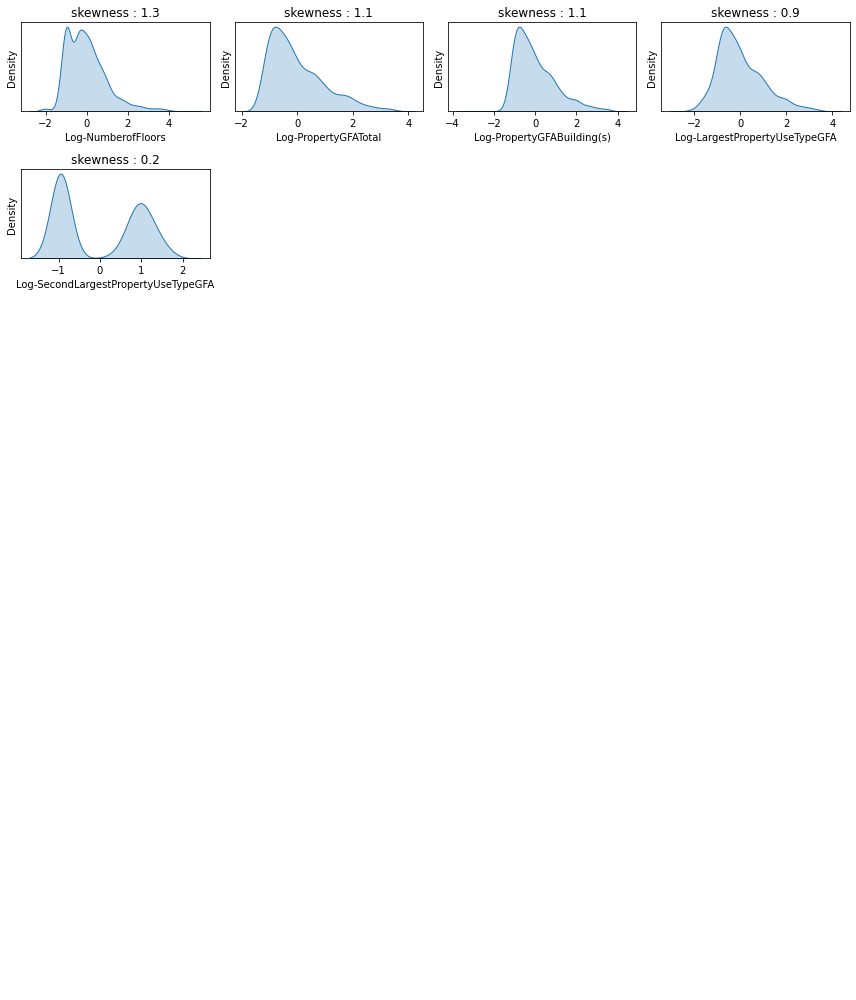

In [91]:
print("We can check that the numerical variables have a Standard Normal distribution.")
density(train_energy_preprocess[numerical_columns_energy_CO2])

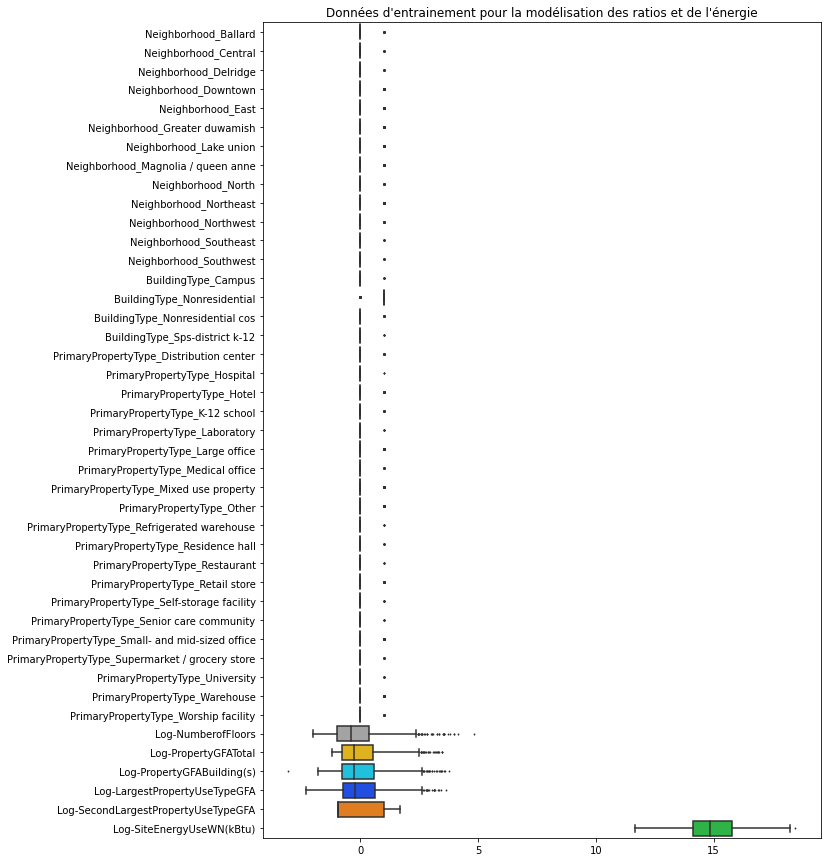

In [92]:
# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(10,15))
plt.title('Données d\'entrainement pour la modélisation des ratios et de l\'énergie')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(train_energy_preprocess), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

We can check that the numerical variables have a Standard Normal distribution.
___Density distribution___


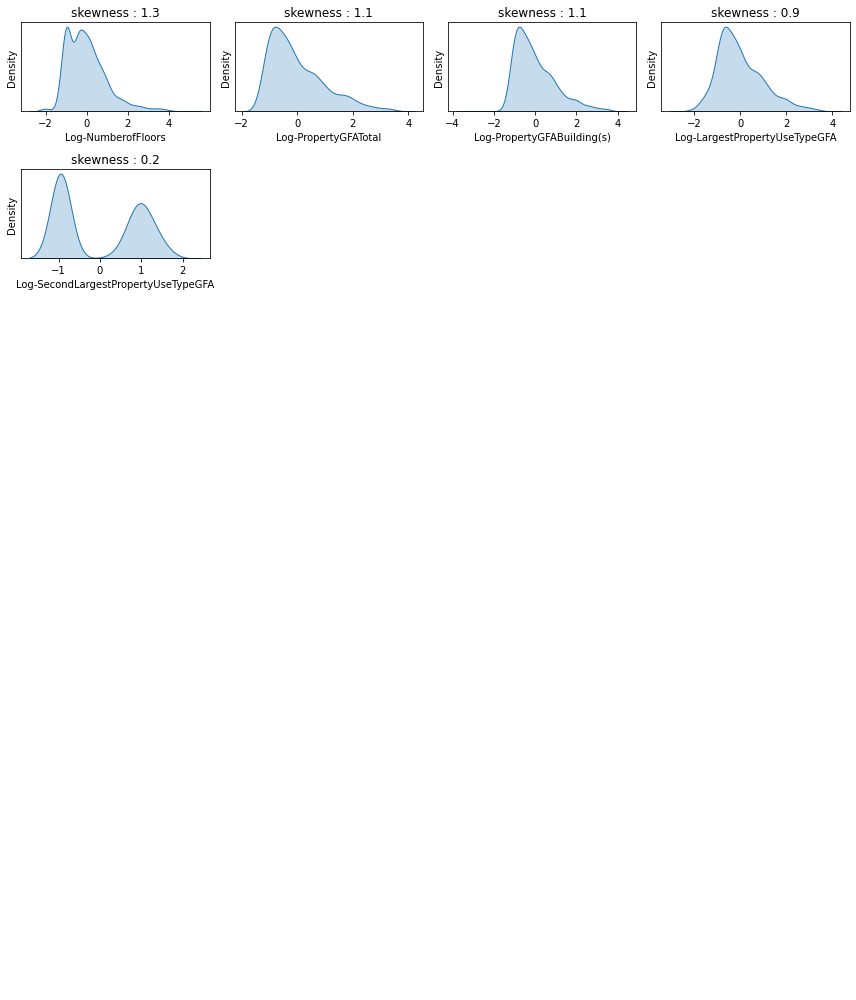

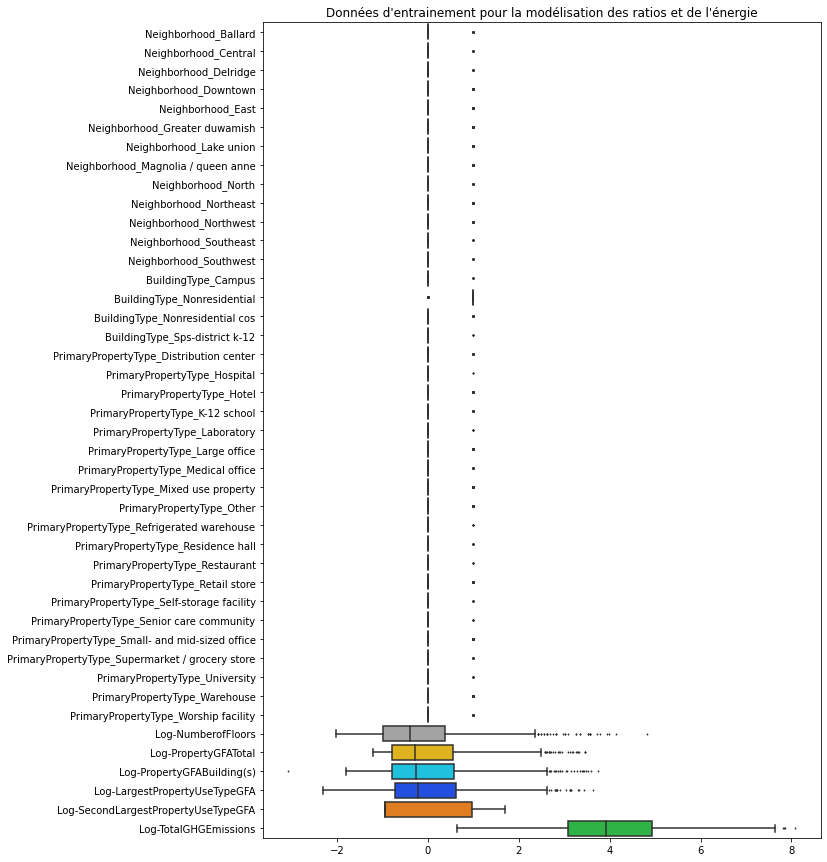

In [93]:
print("We can check that the numerical variables have a Standard Normal distribution.")
density(train_CO2_preprocess[numerical_columns_energy_CO2])

# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(10,15))
plt.title('Données d\'entrainement pour la modélisation des ratios et de l\'énergie')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(train_CO2_preprocess), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

##### ENERGYSTARScore

We can check that the numerical variables have a Standard Normal distribution.
___Density distribution___


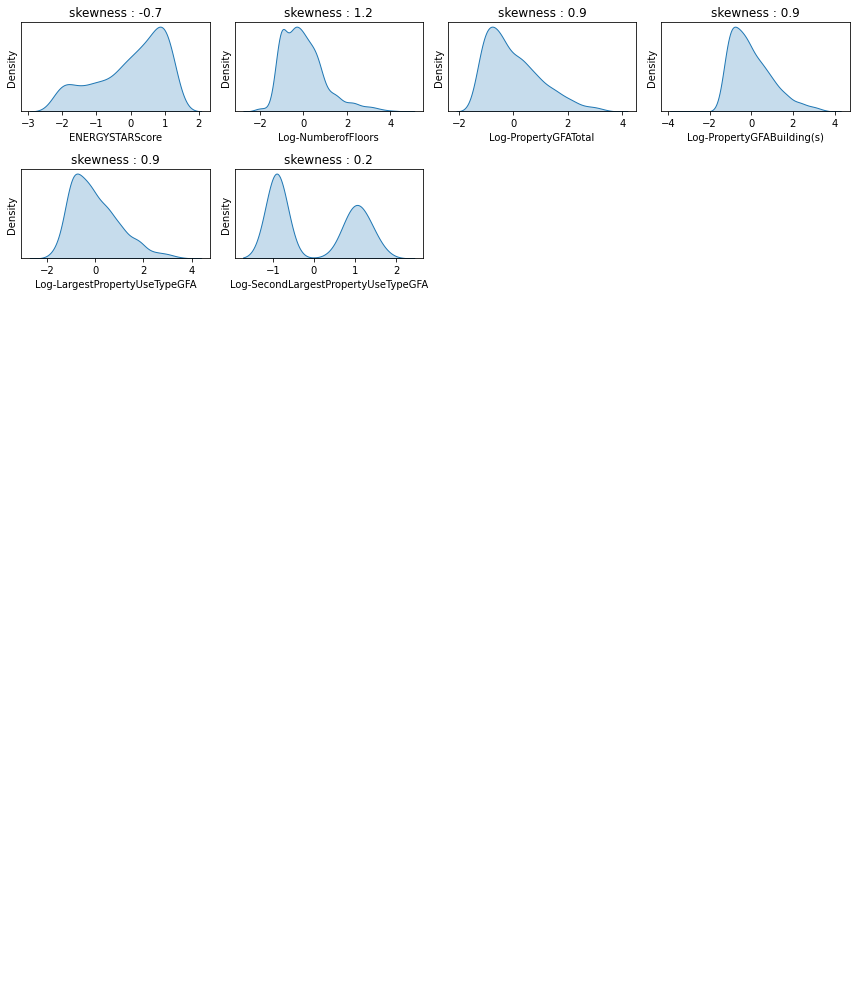

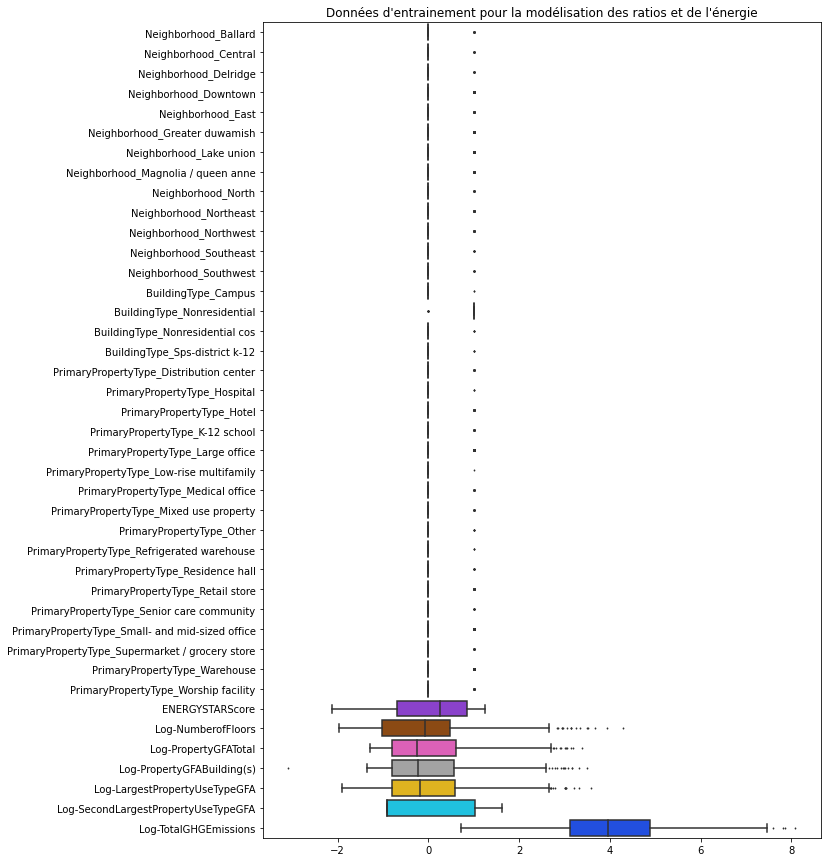

In [94]:
print("We can check that the numerical variables have a Standard Normal distribution.")
density(train_ENERGYSTARScore_preprocess[numerical_columns_ENERGYSTARScore])

# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(10,15))
plt.title('Données d\'entrainement pour la modélisation des ratios et de l\'énergie')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(train_ENERGYSTARScore_preprocess), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

#### 4) Saving dataset

In [95]:
path_save_energy = "./dataset/energy/"
path_save_CO2 = "./dataset/CO2/"
path_save_ENERGYSTARScore = "./dataset/CO2_ENERGYSTARScore/"

##### Energy

In [96]:
# Sauvegarde des jeux de données
train_energy_preprocess.to_csv("{}{}".format(path_save_energy, "train_energy.csv"), encoding='utf-8', index=False)
test_energy_preprocess.to_csv("{}{}".format(path_save_energy, "test_energy.csv"), encoding='utf-8', index=False)

# Sauvegarde du modèle pour standardiser
model = {'scaler': std_scaler_energy, 'scaler_features': numerical_columns_energy_CO2.tolist(), 'encoder': one_hot_encoder, 'encoder_features': categorical_columns.tolist()}
filename = './model/preprocessing/scaler_encoder_energy.sav'
pickle.dump(model, open(filename, 'wb'))

In [97]:
train_energy_preprocess

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-SiteEnergyUseWN(kBtu)
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.786798,0.383431,0.500572,0.585201,-0.949293,15.824652
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.668043,0.551378,0.501434,0.529443,1.012730,15.974742
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.526688,2.914699,2.910821,2.848896,-0.949293,18.118725
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.349822,1.112668,0.781079,0.936959,1.320140,16.500395
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,0.484887,0.067442,0.589913,-0.949293,16.347755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,-0.960301,-0.915986,-0.747596,-0.949293,15.369819
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.990276,0.164832,0.270126,0.368381,-0.949293,14.978305
1481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.038102,-0.334908,-0.256699,-0.110368,-0.949293,14.150370
1482,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.868369,1.831755,1.710516,1.153096,1.411607,17.530998


##### CO2

In [98]:
# Sauvegarde des jeux de données
train_CO2_preprocess.to_csv("{}{}".format(path_save_CO2, "train_CO2.csv"), encoding='utf-8', index=False)
test_CO2_preprocess.to_csv("{}{}".format(path_save_CO2, "test_CO2.csv"), encoding='utf-8', index=False)

# Sauvegarde du modèle pour standardiser
model = {'scaler': std_scaler_CO2, 'scaler_features': numerical_columns_energy_CO2.tolist(), 'encoder': one_hot_encoder, 'encoder_features': categorical_columns.tolist()}
filename = './model/preprocessing/scaler_encoder_CO2.sav'
pickle.dump(model, open(filename, 'wb'))

display(train_CO2_preprocess)

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.786798,0.383431,0.500572,0.585201,-0.949293,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.668043,0.551378,0.501434,0.529443,1.012730,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.526688,2.914699,2.910821,2.848896,-0.949293,7.645053
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.349822,1.112668,0.781079,0.936959,1.320140,6.226556
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,0.484887,0.067442,0.589913,-0.949293,5.713106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.388713,-0.960301,-0.915986,-0.747596,-0.949293,4.911183
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.990276,0.164832,0.270126,0.368381,-0.949293,4.229021
1481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.038102,-0.334908,-0.256699,-0.110368,-0.949293,2.326302
1482,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.868369,1.831755,1.710516,1.153096,1.411607,6.908815


##### ENERGYSTARScore

In [99]:
# Sauvegarde des jeux de données
train_ENERGYSTARScore_preprocess.to_csv("{}{}".format(path_save_ENERGYSTARScore, "train_ENERGYSTARScore.csv"), encoding='utf-8', index=False)
test_ENERGYSTARScore_preprocess.to_csv("{}{}".format(path_save_ENERGYSTARScore, "test_ENERGYSTARScore.csv"), encoding='utf-8', index=False)

# Sauvegarde du modèle pour standardiser
model = {'scaler': std_scaler_ENERGYSTARScore, 'scaler_features': numerical_columns_ENERGYSTARScore.tolist(), 'encoder': one_hot_encoder, 'encoder_features': categorical_columns.tolist()}
filename = './model/preprocessing/scaler_encoder_ENERGYSTARScore.sav'
pickle.dump(model, open(filename, 'wb'))

display(train_ENERGYSTARScore_preprocess)

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility,ENERGYSTARScore,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.116135,1.517477,0.231087,0.346517,0.423714,-0.906874,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.081939,1.408817,0.391999,0.347346,0.367092,0.984004,5.693261
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.396802,2.032644,0.929776,0.616463,0.780927,1.280266,6.226556
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.244595,1.408817,0.166582,0.278214,0.334318,-0.906874,5.176940
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.142007,1.408817,0.790625,0.793873,0.867868,-0.906874,6.539962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.217500,1.517477,1.955805,1.725144,1.871955,1.417336,4.998158
1475,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.183304,1.517477,1.961500,1.724284,1.872819,1.432564,5.313797
1476,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.183304,1.618081,2.068056,1.796142,1.874898,1.494412,5.505982
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.860118,-0.473115,-1.056354,-1.016708,-0.929753,-0.906874,4.911183


In [100]:
t1 = time()
print("computing time : {:8.6f} sec".format(t1-t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1-t0)))

computing time : 9.768766 sec
computing time : 00:00:09
